# IPL Analysis

Importing all the necessary packages for analysis

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the datasets : matches and deliveries

In [330]:
df_matches = pd.read_csv('ipl/matches.csv')
df_deliveries = pd.read_csv('ipl/deliveries.csv')

Take a quick look on both the datasets

In [331]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [332]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Most dismissals by a Wicket Keeper

Get the kinds of dissmissals

In [333]:
df_deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

So, we need stumped and caught as dismissal kind

#### Stumpings by wicket keepers

In [334]:
wicket_keeper_stumping = df_deliveries[df_deliveries['dismissal_kind']=='stumped']['fielder'].value_counts().reset_index()
wicket_keeper_stumping.rename(columns={'index':'wicket_keeper','fielder':'stumping'}, inplace=True)
wicket_keeper_stumping.head()

,wicket_keeper,stumping
0,MS Dhoni,38
1,RV Uthappa,32
2,KD Karthik,29
3,WP Saha,18
4,PA Patel,16


#### Get Wicket Keeper List

In [335]:
wicket_keeper_list = wicket_keeper_stumping['wicket_keeper'].tolist()
wicket_keeper_list

['MS Dhoni',
 'RV Uthappa',
 'KD Karthik',
 'WP Saha',
 'PA Patel',
 'AC Gilchrist',
 'NV Ojha',
 'RR Pant',
 'KC Sangakkara',
 'Q de Kock',
 'MS Bisla',
 'SP Goswami',
 'AB de Villiers',
 'KM Jadhav',
 'BB McCullum',
 'AP Tare',
 'DH Yagnik',
 'KL Rahul',
 'SV Samson',
 'H Klaasen',
 'Kamran Akmal',
 'YV Takawale',
 'CM Gautam',
 'MV Boucher',
 'PR Shah',
 'KB Arun Karthik',
 'N Saini',
 'M Rawat',
 'J Bairstow',
 'Vishnu Vinod',
 'DJ Jacobs',
 'AT Rayudu',
 'Ishan Kishan',
 'Gurkeerat Singh',
 'KH Devdhar']

#### Catches by wicket keepers

In [336]:
wicket_keeper_catches = df_deliveries[(df_deliveries['dismissal_kind']=='caught') & (df_deliveries['fielder'].isin(wicket_keeper_list))]['fielder'].value_counts().reset_index()
wicket_keeper_catches.rename(columns={'index':'wicket_keeper','fielder':'catches'}, inplace=True)
wicket_keeper_catches.head()

,wicket_keeper,catches
0,KD Karthik,109
1,MS Dhoni,98
2,AB de Villiers,93
3,RV Uthappa,84
4,PA Patel,69


#### Wicket Keeper Performance

In [337]:
wicket_keeper_dismissals = pd.merge(wicket_keeper_stumping,wicket_keeper_catches,on='wicket_keeper',how='outer')
wicket_keeper_dismissals.catches = wicket_keeper_dismissals.catches.fillna(0)
wicket_keeper_dismissals.catches = wicket_keeper_dismissals.catches.astype(int)
wicket_keeper_dismissals['total'] = wicket_keeper_dismissals.stumping + wicket_keeper_dismissals.catches
wicket_keeper_dismissals = wicket_keeper_dismissals.sort_values(['total'], ascending=False).reset_index()
wicket_keeper_dismissals.drop('index', axis=1, inplace=True)
wicket_keeper_dismissals.head()

,wicket_keeper,stumping,catches,total
0,KD Karthik,29,109,138
1,MS Dhoni,38,98,136
2,RV Uthappa,32,84,116
3,AB de Villiers,7,93,100
4,PA Patel,16,69,85


We create a chart for the top 10 wicket keepers dismissal

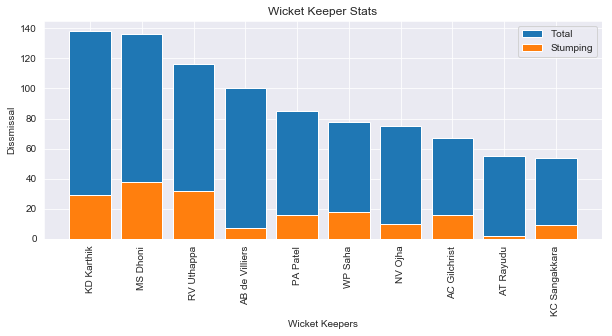

In [338]:
wicket_keeper_dismissals_top10 = wicket_keeper_dismissals.head(10)
plt.figure(figsize=(10,4))
plt.bar(wicket_keeper_dismissals_top10['wicket_keeper'],wicket_keeper_dismissals_top10['total'], label='Total')
plt.bar(wicket_keeper_dismissals_top10['wicket_keeper'],wicket_keeper_dismissals_top10['stumping'], label='Stumping')
plt.xticks(rotation=90)
plt.title('Wicket Keeper Stats')
plt.xlabel('Wicket Keepers')
plt.ylabel('Dissmissal')
plt.legend(loc='upper right')
plt.show()

KD Karthik, MS Dhoni and RV Uthappa have been a great wicketkeeper in IPL. Also, from the above bar chart, we can say that, when it comes to stumping, MS Dhoni performs the best followed by RV Uthappa and KD Karthik.

### Toss Call for a given Venue

Create a different dataframe for toss analysis and get unique cities

In [339]:
df_toss = df_matches[['city','toss_decision','toss_winner','winner']]
# Function to get the unique cities in a particular data frame
def get_unique_citites(df):
    city_dict = df.groupby(['city']).groups
    city_list = []
    for city,stats in city_dict.items():
        city_list.append(city)
    print(city_list)
get_unique_citites(df_toss)

['Abu Dhabi', 'Ahmedabad', 'Bangalore', 'Bengaluru', 'Bloemfontein', 'Cape Town', 'Centurion', 'Chandigarh', 'Chennai', 'Cuttack', 'Delhi', 'Dharamsala', 'Durban', 'East London', 'Hyderabad', 'Indore', 'Jaipur', 'Johannesburg', 'Kanpur', 'Kimberley', 'Kochi', 'Kolkata', 'Mohali', 'Mumbai', 'Nagpur', 'Port Elizabeth', 'Pune', 'Raipur', 'Rajkot', 'Ranchi', 'Sharjah', 'Visakhapatnam']


From the above list, we can see that Bangalore and Bengaluru are the same city as Bangalore city name is changed to Bengaluru. So, we should update Bangalore to Bengaluru

In [340]:
df_toss = df_toss.copy(deep=True)
df_toss.city.loc[df_toss['city']=='Bangalore'] = 'Bengaluru'
get_unique_citites(df_toss)

['Abu Dhabi', 'Ahmedabad', 'Bengaluru', 'Bloemfontein', 'Cape Town', 'Centurion', 'Chandigarh', 'Chennai', 'Cuttack', 'Delhi', 'Dharamsala', 'Durban', 'East London', 'Hyderabad', 'Indore', 'Jaipur', 'Johannesburg', 'Kanpur', 'Kimberley', 'Kochi', 'Kolkata', 'Mohali', 'Mumbai', 'Nagpur', 'Port Elizabeth', 'Pune', 'Raipur', 'Rajkot', 'Ranchi', 'Sharjah', 'Visakhapatnam']


Now, we got a perfect list of unique cities

Let, look at the data now

In [341]:
df_toss.head()

,city,toss_decision,toss_winner,winner
0,Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Pune,field,Rising Pune Supergiant,Rising Pune Supergiant
2,Rajkot,field,Kolkata Knight Riders,Kolkata Knight Riders
3,Indore,field,Kings XI Punjab,Kings XI Punjab
4,Bengaluru,bat,Royal Challengers Bangalore,Royal Challengers Bangalore


Let us look at the unique winners, we should do this to check if there is a draw and hence will get NaN value in *winner*

In [342]:
df_toss.winner.isna().sum()

4

There are in total 4 draw matches. So, we should remove those rows for analysis

In [343]:
df_toss = df_toss[pd.notnull(df_toss['winner'])]
df_toss.winner.isna().sum()

0

Let us look at the count of the data frame

In [344]:
df_toss.count()

city             745
toss_decision    752
toss_winner      752
winner           752
dtype: int64

We have to check for city column as well and delete those rows too

In [345]:
df_toss[df_toss['city'].isna()]

,city,toss_decision,toss_winner,winner
461,NaN,field,Royal Challengers Bangalore,Royal Challengers Bangalore
462,NaN,bat,Kolkata Knight Riders,Delhi Daredevils
466,NaN,field,Rajasthan Royals,Chennai Super Kings
468,NaN,bat,Sunrisers Hyderabad,Sunrisers Hyderabad
469,NaN,bat,Mumbai Indians,Chennai Super Kings
474,NaN,field,Kings XI Punjab,Kings XI Punjab
476,NaN,field,Mumbai Indians,Sunrisers Hyderabad


In [346]:
df_toss = df_toss[pd.notnull(df_toss['city'])]
df_toss.city.isna().sum()

0

Lets check the count of the data frame now

In [347]:
df_toss.count()

city             745
toss_decision    745
toss_winner      745
winner           745
dtype: int64

Looks perfect!

Approach :  If *toss_winner* is a *winner* then *toss_decision* is *true* i.e. decision should be same as *toss_decision* else it should be the opposite

In [348]:
def decision(row):
    if row['toss_winner'] == row['winner']:
        val = row['toss_decision']
    else:
        if row['toss_decision'] == 'bat':
            val = 'field'
        else:
            val = 'bat'
    return val

In [349]:
df_toss['decision'] = df_toss.apply(decision, axis=1)

In [350]:
df_toss.head()

,city,toss_decision,toss_winner,winner,decision
0,Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,bat
1,Pune,field,Rising Pune Supergiant,Rising Pune Supergiant,field
2,Rajkot,field,Kolkata Knight Riders,Kolkata Knight Riders,field
3,Indore,field,Kings XI Punjab,Kings XI Punjab,field
4,Bengaluru,bat,Royal Challengers Bangalore,Royal Challengers Bangalore,bat


Now, let us remove *toss_decision*, *toss_winner* and *winner* from our data set or just take *city* and *decision* columns

In [351]:
df_toss = df_toss[['city','decision']]
df_toss.head()

,city,decision
0,Hyderabad,bat
1,Pune,field
2,Rajkot,field
3,Indore,field
4,Bengaluru,bat


We now have to use one hot encoder to convert categorical variables

In [352]:
df_decision = pd.get_dummies(df_toss.decision)
df_decision.head()

,bat,field
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


Now lets concatenate these two data frames and remove the decision field

In [353]:
df_toss = pd.concat([df_toss,df_decision], axis=1)
df_toss.drop(['decision'], axis=1, inplace=True)
df_toss.head()

,city,bat,field
0,Hyderabad,1,0
1,Pune,0,1
2,Rajkot,0,1
3,Indore,0,1
4,Bengaluru,1,0


We have to now group by the field *city*

In [354]:
df_toss = df_toss.groupby('city').sum().reset_index()
df_toss['total'] = df_toss.bat+df_toss.field
df_toss['bat_decision'] = round(((df_toss.bat)/df_toss.total)*100,2)
df_toss['field_decision'] = round(((df_toss.field)/df_toss.total)*100,2)
df_toss.head()

,city,bat,field,total,bat_decision,field_decision
0,Abu Dhabi,4,3,7,57.14,42.86
1,Ahmedabad,6,6,12,50.00,50.00
2,Bengaluru,33,44,77,42.86,57.14
3,Bloemfontein,1,1,2,50.00,50.00
4,Cape Town,5,2,7,71.43,28.57


Lets now drop *bat*, *field* and *total* columns from the data frame

In [355]:
df_toss.drop(['bat','field','total'], axis=1, inplace=True)

In [356]:
df_toss

,city,bat_decision,field_decision
0,Abu Dhabi,57.14,42.86
1,Ahmedabad,50.00,50.00
2,Bengaluru,42.86,57.14
3,Bloemfontein,50.00,50.00
4,Cape Town,71.43,28.57
5,Centurion,33.33,66.67
6,Chandigarh,43.48,56.52
7,Chennai,61.40,38.60
8,Cuttack,57.14,42.86
9,Delhi,46.58,53.42


From the above table, we can select the toss decision

### Number of wickets taken by a bowler

Ge the unique kinds of dismissals

In [357]:
df_deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

For a bowler to take wickets, the batsman should be dismissed by either one of the following:
'caught', 'bowled', 'lbw', 'caught and bowled', 'stumped'

In [358]:
bowlers = df_deliveries[['bowler','dismissal_kind']]
bowlers = bowlers[(bowlers.dismissal_kind.isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped']))]
bowlers = bowlers.groupby('bowler').count().reset_index()
bowlers.rename(columns={'dismissal_kind':'no_wickets'}, inplace=True)
bowlers = bowlers.sort_values(by='no_wickets', ascending=False)
bowlers = bowlers[(bowlers.no_wickets>=100)]
bowlers

,bowler,no_wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,149
227,PP Chawla,149
82,DJ Bravo,147
46,B Kumar,133
232,R Ashwin,125
296,SP Narine,122
326,UT Yadav,119
244,RA Jadeja,108


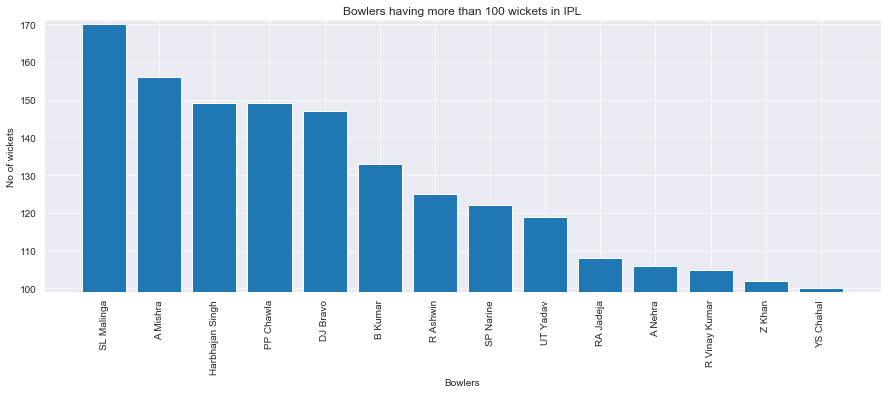

In [359]:
plt.figure(figsize=(15,5))
plt.bar(bowlers.bowler, bowlers.no_wickets)
plt.xticks(rotation=90)
plt.ylim(99,171)
plt.title('Bowlers having more than 100 wickets in IPL')
plt.xlabel('Bowlers')
plt.ylabel('No of wickets')
plt.show()

We can see SL Malinga has taken the most number of wickets in IPL.

### Highest and lowest runs in IPL History

In [360]:
df_id = pd.DataFrame(df_matches[(df_matches.result!='no result') & (df_matches.dl_applied==0)][['id','season']])
df_id.rename(columns={'id':'match_id'}, inplace=True)
df_proper_matches = pd.merge(df_id, df_deliveries, on='match_id', how='inner')
df_proper_matches = df_proper_matches[(df_proper_matches.is_super_over!=1)].groupby(['match_id','inning']).sum().sort_values(by='total_runs', ascending=True).reset_index()[['match_id','inning','total_runs']]
df_proper_matches = df_proper_matches[df_proper_matches.inning<=2]
df_proper_matches.rename(columns={'match_id':'id'}, inplace=True)
lowest, highest = df_proper_matches.head(10), df_proper_matches.tail(10)
lowest = pd.merge(lowest,df_matches,on='id',how='inner')[['season','inning','team1','team2','toss_winner','toss_decision','total_runs']]
highest = pd.merge(highest,df_matches,on='id',how='inner')[['season','inning','team1','team2','toss_winner','toss_decision','total_runs']].sort_values(by='total_runs',ascending=False)
lowest

,season,inning,team1,team2,toss_winner,toss_decision,total_runs
0,2017,2,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,49
1,2009,2,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,58
2,2017,2,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,66
3,2008,1,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,67
4,2008,2,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,68
5,2017,1,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,67
6,2017,2,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,68
7,2014,1,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,70
8,2014,2,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,71
9,2017,1,Kings XI Punjab,Rising Pune Supergiant,Rising Pune Supergiant,field,73


In [361]:
def score_format(df):
    scoring_team = ""
    against = ""
    if(df.toss_decision == 'field'):
        if(df.inning == 1):
            if(df.toss_winner!=df.team1):
                scoring_team = df.team1
                against=df.team2
            else:
                scoring_team = df.team2
                against=df.team1
        else:
            if(df.toss_winner==df.team1):
                scoring_team = df.team1
                against=df.team2
            else:
                scoring_team = df.team2
                against=df.team1
    else:
        if(df.inning == 1):
            if(df.toss_winner==df.team1):
                scoring_team = df.team1
                against=df.team2
            else:
                scoring_team = df.team2
                against=df.team1
        else:
            if(df.toss_winner!=df.team1):
                scoring_team = df.team1
                against=df.team2
            else:
                scoring_team = df.team2
                against=df.team1
    return scoring_team,against

In [362]:
lowest['low_scoring_team'] = lowest.apply(lambda row : score_format(row)[0], axis = 1)
lowest['against'] = lowest.apply(lambda row : score_format(row)[1], axis = 1)

In [363]:
lowest = lowest[['low_scoring_team','against','total_runs','season']]
lowest

,low_scoring_team,against,total_runs,season
0,Royal Challengers Bangalore,Kolkata Knight Riders,49,2017
1,Rajasthan Royals,Royal Challengers Bangalore,58,2009
2,Delhi Daredevils,Mumbai Indians,66,2017
3,Kolkata Knight Riders,Mumbai Indians,67,2008
4,Mumbai Indians,Kolkata Knight Riders,68,2008
5,Delhi Daredevils,Kings XI Punjab,67,2017
6,Kings XI Punjab,Delhi Daredevils,68,2017
7,Royal Challengers Bangalore,Rajasthan Royals,70,2014
8,Rajasthan Royals,Royal Challengers Bangalore,71,2014
9,Kings XI Punjab,Rising Pune Supergiant,73,2017


In [364]:
highest['high_scoring_team'] = highest.apply(lambda row : score_format(row)[0], axis = 1)
highest['against'] = highest.apply(lambda row : score_format(row)[1], axis = 1)

In [365]:
highest = highest[['high_scoring_team','against','total_runs','season']]
highest

,high_scoring_team,against,total_runs,season
9,Royal Challengers Bangalore,Pune Warriors,263,2013
8,Kolkata Knight Riders,Kings XI Punjab,250,2018
7,Royal Challengers Bangalore,Gujarat Lions,248,2016
6,Chennai Super Kings,Rajasthan Royals,246,2010
5,Kolkata Knight Riders,Mumbai Indians,241,2019
4,Chennai Super Kings,Kings XI Punjab,240,2008
3,Royal Challengers Bangalore,Mumbai Indians,235,2015
2,Sunrisers Hyderabad,Royal Challengers Bangalore,233,2019
0,Kings XI Punjab,Royal Challengers Bangalore,232,2011
1,Sunrisers Hyderabad,Kings XI Punjab,232,2019


### Average runs in all IPL seasons

In [366]:
df_matchwise_runs = df_deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index().groupby('match_id').sum()['total_runs'].reset_index()
df_matchwise_runs['average_runs'] = df_matchwise_runs['total_runs']/2
df_matchwise_runs.drop('total_runs', axis=1, inplace=True)
df_id = df_matches[['id','season']]
df_id = df_id.rename(columns={'id':'match_id'})
df_matchwise_runs = pd.merge(df_id, df_matchwise_runs, on='match_id', how='inner')
df_matchwise_runs.drop('match_id', axis=1, inplace=True)
season_average = df_matchwise_runs.groupby('season').mean().reset_index()
season_average.average_runs = round(season_average.average_runs).astype(int)
season_average

,season,average_runs
0,2008,155
1,2009,143
2,2010,157
3,2011,145
4,2012,152
5,2013,149
6,2014,158
7,2015,156
8,2016,157
9,2017,159


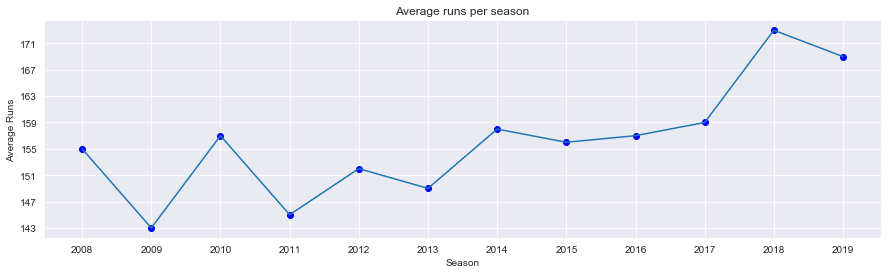

In [367]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(15,4))
plt.plot(season_average.season,season_average.average_runs, 'bo')
plt.plot(season_average.season,season_average.average_runs)
plt.title('Average runs per season')
plt.xlabel('Season')
plt.ylabel('Average Runs')
plt.xticks(np.arange(np.min(season_average.season), np.max(season_average.season)+1, step=1)) 
plt.yticks(np.arange(np.min(season_average.average_runs), np.max(season_average.average_runs)+1, step=4))
plt.show()

From the above time-series graph, we cans say that in season 2009, the average score was very less and in season 2018, the average score was highest.